In [22]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq  # 多项式
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  # 矢量化

In [11]:
def real_func(x):
    return np.sin(2*np.pi*x)


def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)


def residu_func(p, x, y):
    return fit_func(p, x) - y

In [12]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [13]:
def fitting(M=0):
    p_init = np.random.rand(M + 1)
    p_lsq = leastsq(residu_func, p_init, args=(x, y))
    print('Fitting Parameters', p_lsq[0])

    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters [0.03083202]


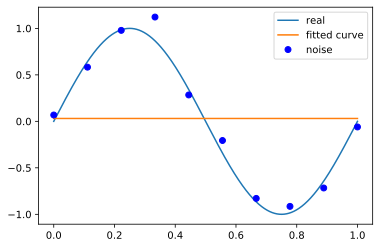

In [14]:
p_lsq_0 = fitting(0)

Fitting Parameters [-1.42165545  0.74165974]


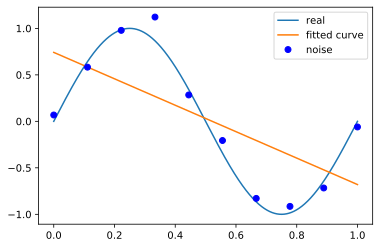

In [15]:
p_lsq_1 = fitting(1)

Fitting Parameters [-6.71306626e+01  1.71914873e+02 -1.34001999e+02  2.55570188e+01
  3.52627342e+00  5.79872166e-02]


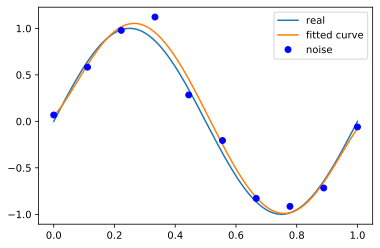

In [16]:
p_lsq_5 = fitting(5)

Fitting Parameters [ 4.86158535e+04 -2.21381393e+05  4.24120413e+05 -4.43879370e+05
  2.75413132e+05 -1.02604064e+05  2.20698202e+04 -2.46624606e+03
  1.11725374e+02  6.82175819e-02]


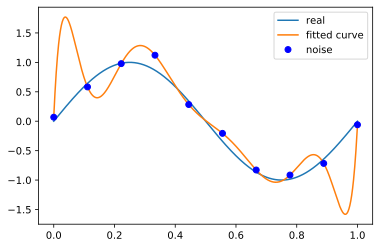

In [17]:
p_lsq_9 = fitting(9)

+ 正则化

In [18]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))
    return ret

In [20]:
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

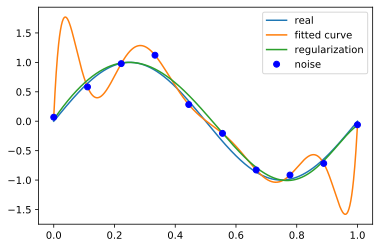

In [21]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(
    p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()